# Exercise 1: Wealth dynamics with AR(1) returns

Recall the household wealth dynamics we studied in the previous lecture, where assets $a_{i,t}$ 
evolved according to
$$
a_{i,t+1} = R s a_{i,t} + y_{i,t+1}
$$
and we assumed a fixed savings rate $s$, a fixed gross return $R$
and some stochastic income process $y_{i,t}$.

In this exercise, we alter this setting to *stochastic returns* which follow an AR(1)
so that the model of wealth dynamics is now given by
$$
\begin{aligned}
a_{i,t+1} &= R_{i,t+1} s a_{i,t} + y_{i,t+1} \\
\log R_{i,t+1} &= \mu_r + \rho_r \log R_{i,t} + \epsilon_{i,t+1}\,, \qquad 
    \epsilon_{i,t+1} \stackrel{\text{iid}}{\sim} \mathcal{N}\left(0, \sigma_r^2 \right) \\
\log y_{i,t+1} &\stackrel{\text{iid}}{\sim} \mathcal{N}\left(\mu_y, \sigma_y^2 \right)
\end{aligned}
$$
where $R_{i,t+1}$ follows an AR(1) in logs and $y_{i,t+1}$ is log-normally distributed.

## Parameters

To remain comparable with the scenarios discussed in the lecture, we set the following parameters:

| Parameter  | Description | Value       |
|------------|-------------|-------------|
| s | Savings rate | 0.75 |
| $\sigma_y$ | Volatility of log labor income | 0.1 |
| $\mu_y$ | Mean of log labor income | $-\frac{1}{2}\sigma_y^2$|
| $\rho_r$  | Autocorrelation of log returns | 0.6 |
| $\sigma_r$ | Volatility of log return shocks | 0.2 |
| $\mu_r$ | Intercept of log returns | $(1-\rho_r) \log(1.1) - \frac{1}{2}\frac{\sigma_r^2}{1+\rho_r}$

The parameter $\mu_y$ is chosen so that average income in levels is one, $\mathbb{E}[y_{i,t}] = 1$,
while $\mu_r$ is chosen so that average gross returns are 1.1 as in the lecture, i.e., $\mathbb{E}[R_{i,t}] = 1.1$.

The following code defines the parameters class for this problem:

In [1]:
import numpy as np
from dataclasses import dataclass

@dataclass
class Parameters:
    """
    Parameters for model with stochastic returns.
    """
    s: float = 0.75                             # Exogenous savings rate
    sigma_y: float = 0.1                        # Standard deviation of log income
    mu_y: float = -sigma_y**2.0/2.0             # Mean of log income
    rho_r: float = 0.6                          # Persistence of log gross returns  
    sigma_r: float = 0.2                        # Standard deviation of log gross returns
    mu_r: float = (1-rho_r) * np.log(1.1) - sigma_r**2/2/(1+rho_r)    # Mean of log gross returns    

In [2]:
# Create an instance of the Parameters class
par = Parameters()

The following code verifies that the calibration of parameters yields the desired moments $E[y_{i,t}] = 1$ and $E[R_{i,t}] = 1.1$. For this we use the formulas for the mean and variance of log-normal variables,

$$
\begin{aligned}
    \log X \stackrel{\text{iid}}{\sim} \mathcal{N}\left(\mu, \sigma^2 \right)
    \quad\Longrightarrow\quad
    \begin{cases}
    \mathbb{E}[X] &= e^{ \mu + \frac{1}{2}\sigma^2} \\
    \text{Var}(X) &= \left( e^{\sigma^2} - 1 \right) e^{2 \mu + \sigma^2}
    \end{cases}
\end{aligned}
$$

In [3]:
# Mean of income in levels (from log-normal formula)
y_mean = np.exp(par.mu_y + par.sigma_y**2 / 2)

# From the formulas for mean & variance of AR(1) process:
# Unconditional mean of log gross returns
uncond_mean_log_R = par.mu_r / (1 - par.rho_r)
# Unconditional variance of log gross returns
uncond_var_log_R = par.sigma_r**2 / (1 - par.rho_r**2)

# Unconditional mean of gross returns (from log-normal formula)
R_mean = np.exp(uncond_mean_log_R + uncond_var_log_R/2)

print(f'Mean income:       {y_mean:.3f}')
print(f'Mean gross return: {R_mean:.3f}')

Mean income:       1.000
Mean gross return: 1.100


Lastly, we can use the variance formula above to get an idea of the conditional standard deviation of returns:

In [4]:
# Use variance formula for log-normal random variables
R_var_cond = (np.exp(par.sigma_r**2) - 1) * np.exp(2*par.mu_r + par.sigma_r**2)
print(f'Conditional standard deviation of gross returns: {np.sqrt(R_var_cond):.3f}')

Conditional standard deviation of gross returns: 0.211


This value is slightly higher that the volatility of annual returns of the S&P500, but still within reasonable bounds.

## Tasks

We are interested in simulating the wealth dynamics and compute the Gini coefficient using the same approach as we did in the lecture.

1.  Simulate gross returns for 1,000,000 periods and compute the unconditional mean. Verify that this mean is close to the calibration target of 1.1.

    *Hint:* Use the `simulate_ar1()` function for this purpose. This function is replicated in the module `workshop08_ex1.py` for convenience.
    
2.  Write a function `simulate_wealth()` to simulate the wealth trajectories of a panel of households who face AR(1) returns. The function signature should look
    as follows:

    ```python
    def simulate_wealth(par: Parameters, a0, T, N, rng=None):
        """
        Simulate the evolution of wealth when returns are stochastic.

        Parameters
        ----------
        par : Parameters
        a0 : float
            Initial wealth.
        T : int
            Number of time periods to simulate.
        N : int
            Number of individuals to simulate.
        rng : numpy.random.Generator, optional
            A random number generator instance.

        Returns
        -------
        a_sim : numpy.ndarray
            A (T+1, N) array of simulated wealth paths.
        """
    ```

    Set the initial value of $\log R_{i,t}$ to the unconditional mean $\frac{\mu_r}{1-\rho_r}$ for all households.

    *Hint:* Use the wealth simulation routine from the lecture as a template and make the necessary changes.

3.  Using an initial wealth of $a_0 = 1$ for all households, simulate $N=20$ households for $T=100$ periods. 
    Plot the wealth trajectories for these households in a single graph and also include the average simulated wealth.

4.  Simulate a larger panel of $N=1,000,000$ households for $T=200$ periods. Compute the cross-sectional mean and variance
    of wealth for each period $t$ and plot these in a figure with two subplots (one for the mean, one for the variance).
    
    How do these plots compare to the scenarios (with IID and AR(1) income) discussed in the lecture?

5.  From the previous plots you suspect that the Gini coefficient changes somewhat across periods.
    Compute a cross-sectional Gini coefficients each of the last 100 periods of your simulation
    and plot these Ginis as a time series. Add a horizontal line indicating the average Gini coefficient.

    *Hint:* Use the `gini()` function from the `workshop08_ex1` module for this purpose.

In [5]:
# Enable automatic reloading of external modules
%load_ext autoreload
%autoreload 2

## Solution

### Part (1)

We import the `simulate_ar1()` function to simulate the log of gross returns which follow an AR(1). We then compute the unconditional mean of gross returns in levels.

In [6]:
from workshop08_ex1 import simulate_ar1

# Number of periods
T = 1_000_000

# Initial value (does not matter for this exercise)
log_R0 = np.log(R_mean)

# Simulate log gross returns
log_R_sim = simulate_ar1(log_R0, par.mu_r, par.rho_r, par.sigma_r, T)

# Convert to gross returns in levels
R_sim = np.exp(log_R_sim)

# Compute simulated mean
R_mean_sim = np.mean(R_sim)

print(f'Mean returns: exact = {R_mean:.3f}, simulated = {R_mean_sim:.3f}')

Mean returns: exact = 1.100, simulated = 1.101


As you can see, the mean of the simulated values is quite close to the exact analytical value.

### Part (2)

The following function implements the wealth simulation with AR(1) log returns and IID income. The code proceeds in six main steps:

1. Draw all IID log income realizations for all $N$ households and all $T$ periods and store them in a $T \times N$ array.
2. Draw all AR(1) return shock realizations for all $N$ households and all $T$ periods and store them in a $T \times N$ array.
3. Assume that all individuals start with the same log return which corresponds to the unconditional mean of the AR(1).
4. Set the initial assets for all households to the given value $a_0$.
5. Use the AR(1) law-of-motion to simulate next-period returns given current returns.
6. Use the asset law-of-motion to simulate next-period assets.

In [7]:
def simulate_wealth(par: Parameters, a0, T, N, rng=None):
    """
    Simulate the evolution of wealth when returns are stochastic.

    Parameters
    ----------
    par : Parameters
    a0 : float
        Initial wealth.
    T : int
        Number of time periods to simulate.
    N : int
        Number of individuals to simulate.
    rng : numpy.random.Generator, optional
        A random number generator instance.

    Returns
    -------
    a_sim : numpy.ndarray
        A (T+1, N) array or simulated wealth paths.
    """

    if rng is None:
        rng = np.random.default_rng(seed=1234)

    # Random draws of income
    log_y = rng.normal(loc=par.mu_y, scale=par.sigma_y, size=(T, N))
    # Innovations to log gross returns
    epsilon_R = rng.normal(loc=0, scale=par.sigma_r, size=(T, N))

    # Income in levels
    y = np.exp(log_y)

    # Set initial value for log returns:
    # Unconditional mean of log gross returns
    log_R_mean = par.mu_r /  (1 - par.rho_r)
    # Simulated AR(1) returns (store only one period at a time)
    log_R_sim = np.full(N, fill_value=log_R_mean)

    # Create array to store the simulated wealth paths
    a_sim = np.zeros((T+1, N))
    a_sim[0] = a0

    for t in range(T):
        # Savings out of beginning-of-period assets
        savings = par.s * a_sim[t]

        # Log gross returns next period
        log_R_sim = par.mu_r + par.rho_r * log_R_sim + epsilon_R[t]

        # Gross returns next period
        R_sim = np.exp(log_R_sim)

        # Next-period assets
        a_sim[t+1] = R_sim * savings + y[t]

    return a_sim

### Part (3)

First, we simulate wealth trajectories for only a handful of households to get some idea about the dynamics.

In [8]:
# Initial wealth (identical for all households)
a0 = 1.0
# Number of periods to simulate
T = 100
# Number of households to simulate
N = 20

# Simulate the wealth paths (result is an array of shape (T+1, N))
a_sim = simulate_wealth(par, a0, T, N)

# Mean of simulated time series
a_sim_mean = np.mean(a_sim, axis=1)

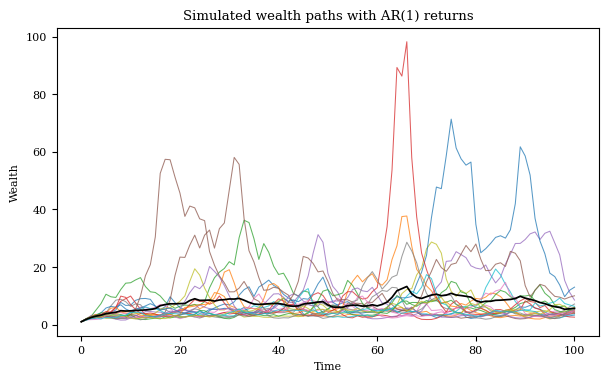

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))

plt.plot(a_sim, alpha=0.75, lw=0.75)
plt.xlabel('Time')
plt.ylabel('Wealth')
plt.title('Simulated wealth paths with AR(1) returns')
plt.plot(a_sim_mean, color='black', ls='-', lw=1.25)

### Part (4)

We now rerun the simulation for a much larger panel of households.

In [10]:
# Simulate larger sample
N = 1_000_000
# Number of periods to simulate
T = 200

# Simulate the wealth paths (result is an array of shape (T+1, N))
a_sim = simulate_wealth(par, a0, T, N)

# Mean of simulated time series
a_sim_mean = np.mean(a_sim, axis=1)
a_sim_var = np.var(a_sim, axis=1)

Text(0.5, 0, 'Time')

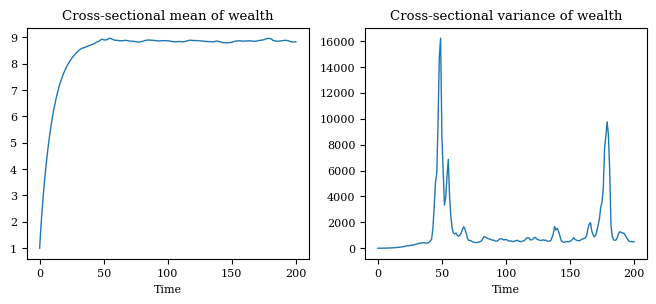

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharex=True)

ax1.plot(a_sim_mean, lw=1)
ax1.set_xlabel('Time')
ax1.set_title('Cross-sectional mean of wealth')
ax2.plot(a_sim_var, lw=1)
ax2.set_title('Cross-sectional variance of wealth')
ax2.set_xlabel('Time')

As the graphs indicate, the cross-sectional means and in particular variances are much jumpier than for the IID and AR(1) income scenarios studied in the lecture.

### Part (5)

We loop over the last 100 periods of the simulation and compute the Gini for the cross section of wealth holdings in each period $t$.

In [12]:
from workshop08_ex1 import gini

# Array to store Ginis for last 100 periods
ginis = np.empty(100)

# Iterate over the last 100 periods
for t in range(-100, 0):
    ginis[t] = gini(a_sim[t])

Text(0.5, 1.0, 'Cross-sectional Gini coefficient')

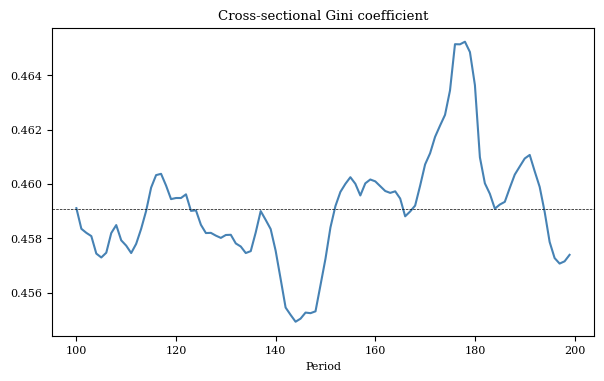

In [13]:
# Create histogram of cross-sectional Gini coefficients for last 100 periods
periods = np.arange(T-100, T)

plt.figure(figsize=(7, 4))
plt.plot(periods, ginis, color='steelblue')
plt.axhline(np.mean(ginis), color='black', lw=0.5, ls='--')
plt.xlabel('Period')
plt.title('Cross-sectional Gini coefficient')

 While the variances were quite volatile, the Gini does not change much across periods. As you can see, the Gini for this model is substantially higher than for the AR(1) income case discussed in the lecture, but still not at the level observed in the data (for example, the wealth Gini for the US is about 0.8).

***
# Exercise 2: AR(1) vs Random Walk

Recall the AR(1) process we studied in the lecture, defined as 
$$
x_{i,t+1} = \rho x_{i,t} + \epsilon_{i,t+1}\,, \qquad \epsilon_{t+1} \stackrel{\text{iid}}{\sim} \mathcal{N}\left(0, \sigma^2\right)
$$
In the lecture, we restricted our attention to the stationary case with $\rho \in (-1, 1)$. With $\rho = 1$, the above process is called a Random walk
which is no longer stationary as its variance is linearly increasing in time.

To demonstrate this, perform the following tasks:

1. Write a function `simulate_panel()` which simulates a *panel* of individuals $i$ where each individual-specific realization $x_{i,t}$ follows the
    stochastic process defined above. The function signature should look as follows:

    ```python
    def simulate_panel(rho, sigma, T, N, x0=0, rng=None):
        """
        Simulates a panel of stochastic processes.

        Parameters
        ----------
        rho : float
            The autoregressive parameter.
        sigma : float
            The standard deviation of the noise term.
        T : int
            The number of time periods to simulate.
        N : int
            The number of individuals to simulate.
        x0 : float, optional
            The initial value of the process.
        rng : Generator, optional
            Random number generator to use.

        Returns
        -------
        numpy.ndarray
            A (T+1, N) array with the simulated values.
        """
    ```
2. Let $\sigma=0.1$. Simulate the trajectories of a cross section of $N=100,000$ individuals for $T=300$ periods for two different scenarios:

    1.  AR(1) with $\rho = 0.9$;
    2.  Random walk with $\rho = 1$

    Make sure to use the same seed for both simulations.


3.  Create a figure with two subplots:

    1.  The first subplot should contain two lines showing the average value of the simulated AR(1) and Random walk for each period $t$,
        i.e., average across $N$ individuals for each $t$.
    2.  The second subplot should contain two lines showing the variance of the simulated AR(1) and Random walk for each period $t$.

4.  Repeat the previous exercise, but use $\rho=0.99$ for the AR(1) instead. How does behavior of the cross-sectional mean and variance of the AR(1) change?

## Solution

### Part (1)

The simulating routine is almost identical to `simulate_ar1()` we wrote earlier, but instead of a single value, we simulate the entire cross-section of households one period at a time.

In [14]:
import numpy as np

def simulate_panel(rho, sigma, T, N, x0=0, rng=None):
    """
    Simulates a panel of stochastic processes.

    Parameters
    ----------
    rho : float
        The autoregressive parameter.
    sigma : float
        The standard deviation of the noise term.
    T : int
        The number of time periods to simulate.
    N : int
        The number of individuals to simulate.
    x0 : float, optional
        The initial value of the process.
    rng : Generator, optional
        Random number generator to use.

    Returns
    -------
    numpy.ndarray
        A (T+1, N) array with the simulated values.
    """

    # Create RNG instance
    if rng is None:
        rng = np.random.default_rng(seed=1234)
    
    # Create an array to store the simulated values
    x = np.zeros((T+1, N))

    # Set the initial value
    x[0] = x0
        
    # Draw random shocks
    eps = rng.normal(0, sigma, size=(T, N))

    # Simulate the stochastic process
    for t in range(T):
        x[t+1] = rho * x[t] + eps[t]

    return x

### Part (2)

In [15]:
# Standard deviation of innovations (both AR(1) and Random walk)
sigma = 0.1
# Autocorrelation coefficient for AR(1) case
rho = 0.9

# Number of individuals
N = 100_000
# Number of periods
T = 300

# Seed for both simulations
seed = 1234

# Simulate the AR(1)
rng = np.random.default_rng(seed)
ar1_sim = simulate_panel(rho=rho, sigma=sigma, T=T, N=N, rng=rng)

# Simulate the random walk
rng = np.random.default_rng(seed)
rw_sim = simulate_panel(rho=1, sigma=sigma, T=T, N=N, rng=rng)

### Part (3)

We first compute the mean and variance for both the AR(1) and the Random walk.

In [16]:
# Moments for AR(1)
ar1_sim_mean = np.mean(ar1_sim, axis=1)
ar1_sim_var = np.var(ar1_sim, axis=1)

# Moments for Random walk
rw_sim_mean = np.mean(rw_sim, axis=1)
rw_sim_var = np.var(rw_sim, axis=1)

We can now plot these for each period:

Text(0.5, 1.0, 'Variance')

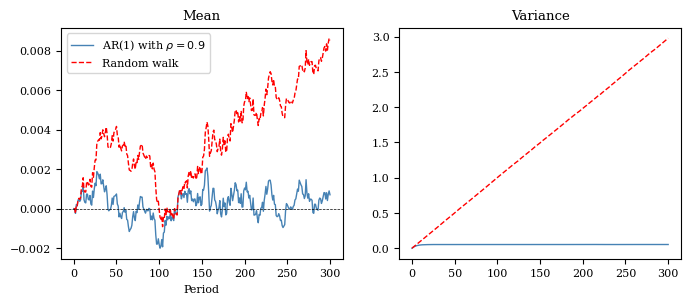

In [17]:
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3), sharex=True)

ax0.plot(ar1_sim_mean, lw=1, color='steelblue', label=f'AR(1) with $\\rho={rho}$')
ax0.plot(rw_sim_mean, lw=1, color='red', ls='--', label='Random walk')
ax0.set_xlabel('Period')
ax0.set_title('Mean')
ax0.axhline(0, color='black', lw=0.5, ls='--')
ax0.legend()

ax1.plot(ar1_sim_var, lw=1, color='steelblue', label='AR(1)')
ax1.plot(rw_sim_var, lw=1, color='red', ls='--', label='Random walk')
ax0.set_xlabel('Period')
ax1.set_title('Variance')

As the figure shows, for the AR(1) the average simulated realizations remain close around their expected value of 0 and the cross-sectional variance quickly converges to its unconditional value $\sigma^2/(1-\rho^2)$.

### Part (4)

We repeat the steps from Part (3) but simulate the AR(1) with $\rho = 0.99$ instead.

In [18]:
# Standard deviation of innovations (both AR(1) and Random walk)
sigma = 0.1
# Autocorrelation coefficient for AR(1) case
rho = 0.99

# Number of individuals
N = 100_000
# Number of periods
T = 300

# Seed for both simulations
seed = 1234

# Simulate the AR(1)
rng = np.random.default_rng(seed)
ar1_sim = simulate_panel(rho=rho, sigma=sigma, T=T, N=N, rng=rng)

# Simulate the random walk
rng = np.random.default_rng(seed)
rw_sim = simulate_panel(rho=1, sigma=sigma, T=T, N=N, rng=rng)

In [19]:
# Moments for AR(1)
ar1_sim_mean = np.mean(ar1_sim, axis=1)
ar1_sim_var = np.var(ar1_sim, axis=1)

# Moments for Random walk
rw_sim_mean = np.mean(rw_sim, axis=1)
rw_sim_var = np.var(rw_sim, axis=1)

Text(0.5, 1.0, 'Variance')

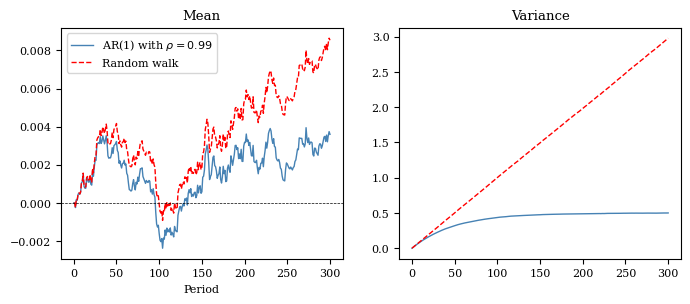

In [20]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3), sharex=True)

ax0.plot(ar1_sim_mean, lw=1, color='steelblue', label=f'AR(1) with $\\rho={rho}$')
ax0.plot(rw_sim_mean, lw=1, color='red', ls='--', label='Random walk')
ax0.set_xlabel('Period')
ax0.set_title('Mean')
ax0.axhline(0, color='black', lw=0.5, ls='--')
ax0.legend()

ax1.plot(ar1_sim_var, lw=1, color='steelblue', label='AR(1)')
ax1.plot(rw_sim_var, lw=1, color='red', ls='--', label='Random walk')
ax0.set_xlabel('Period')
ax1.set_title('Variance')

When the AR(1) features higher serial correlation (and thus less mean reversion), the cross-sectional mean more strongly deviates from its expected value, and the cross-sectional variance converges more slowly to its unconditional value.